In [250]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
! pip install glove-python-binary
from glove import Corpus, Glove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [251]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [252]:
from pathlib import Path

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.feature_extraction.text import CountVectorizer
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm, tqdm_notebook
from sklearn.feature_extraction.text import TfidfVectorizer
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [253]:
! pip install glove-python-binary
from glove import Corpus, Glove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
import gensim
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
! pip install glove-python-binary
from glove import Corpus, Glove

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from bnlp.corpus import stopwords
#from bnlp.corpus.util import remove_stopwords
#from bnltk.stemmer import BanglaStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [255]:
##from bnlp.corpus import stopwords
#from bnlp.corpus.util import remove_stopwords

#from bnltk.stemmer import BanglaStemmer

from pandas import read_excel
import re
from re import sub
import multiprocessing

import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D

from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [256]:
from pathlib import Path

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.feature_extraction.text import CountVectorizer
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm, tqdm_notebook
from sklearn.feature_extraction.text import TfidfVectorizer
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [84]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [85]:
df=pd.read_csv('/content/jews.csv')
df.head()

,Unnamed: 0,date,message,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT
0,0,2021-01-01 14:01:02,Prime Minister Benjamin Netanyahu and Health M...,0.145978,0.012841,0.125456,0.103634,0.104054,0.046527
1,1,2021-01-03 16:00:17,Albert Einstein's work in civil rights is ofte...,0.072914,0.002527,0.073019,0.059791,0.008163,0.012105
2,2,2021-01-04 09:24:03,"In The New York Times Opinion Section ""I’m not...",0.146875,0.006123,0.130355,0.048759,0.021488,0.030992
3,3,2021-01-06 00:45:32,A couple was kicked off a flight to Israel aft...,0.273598,0.015933,0.373777,0.157407,0.108910,0.307969
4,4,2021-01-10 19:38:57,Anti-Trump Hollywood star Arnold Schwarzenegge...,0.280214,0.013436,0.298063,0.318118,0.035022,0.048236


In [86]:
df.shape

(321, 9)

In [87]:
#cleaning the texts
import re
corpus=[]
max=0
for i in range(len(df)):
    review=re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    #ps = PorterStemmer()
    #review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review=str(review)
    #review=review.split()
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if not w.lower() in stop_words]
    #review=str(review)
    #review=review.split()
    #review=' '.join(review)
    #li = list(review.split(" "))
    #corpus.append(li)
    corpus.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


429


In [88]:
corpus

[['prime',
  'minister',
  'benjamin',
  'netanyahu',
  'health',
  'minister',
  'yuli',
  'edelstein',
  'met',
  'afternoon',
  'anti',
  'coronavirus',
  'vaccination',
  'facility',
  'umm',
  'al',
  'fahm',
  '1',
  '000',
  '000th',
  'person',
  'israel',
  'vaccinated',
  'also',
  'participating',
  'visit',
  'umm',
  'al',
  'fahm',
  'mayor',
  'samir',
  'sobhi',
  'mahameed',
  'clalit',
  'healthcare',
  'services',
  'chairman',
  'harel',
  'locker',
  'maccabi',
  'healthcare',
  'services',
  'chairman',
  'ran',
  'saar',
  'official',
  'responsible',
  'coronavirus',
  'affairs',
  'arab',
  'sector',
  'ayman',
  'saif',
  'jabarin',
  'muhammad',
  '66',
  'resident',
  'umm',
  'al',
  'fahm',
  '1',
  '000',
  '000th',
  'person',
  'israel',
  'vaccinated',
  'prime',
  'minister',
  'netanyahu',
  'excitement',
  'jabarin',
  '1',
  '000',
  '000th',
  'person',
  'state',
  'israel',
  'vaccinated',
  'breaking',
  'records',
  'brought',
  'millions',
  

In [49]:
'''#df=pd.read_csv(DATA_PATH)
#df.columns=["Text", "Polarity"]
df_train=df.head(257)
df_test=df.tail(65)
corpus=[]
max=0
for i in range(0,len(df_train)):  #1055
    review = df['message'][i]
    li = list(review.split(" "))
    corpus.append(li)'''

'#df=pd.read_csv(DATA_PATH)\n#df.columns=["Text", "Polarity"]\ndf_train=df.head(257)\ndf_test=df.tail(65)\ncorpus=[]\nmax=0\nfor i in range(0,len(df_train)):  #1055\n    review = df[\'message\'][i]\n    li = list(review.split(" "))\n    corpus.append(li)'

In [50]:
! pip install glove-python-binary
from glove import Corpus, Glove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
!pip install -U bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import gensim

In [90]:
model=gensim.models.Word2Vec(min_count=3,size=50,workers=4,window=5)
model.build_vocab(corpus,progress_per=100)
model.train(corpus,total_examples=model.corpus_count,epochs=10)
words=list(model.wv.index2word)
print(words)

['jews', 'israel', 'jewish', 'people', 'anti', 'jerusalem', 'one', 'holocaust', 'said', 'state', 'israeli', 'would', 'minister', 'world', 'also', 'us', 'new', 'country', 'orthodox', 'attacks', 'violence', 'arab', 'u', 'many', 'today', 'say', 'day', 'vaccinated', 'like', 'palestinian', 'million', 'american', 'media', 'arabs', 'religious', 'citizens', 'war', 'prime', 'ultra', 'hamas', 'time', 'must', 'https', 'president', 'social', 'police', 'nazi', 'group', 'years', 'every', 'white', 'two', 'semitic', 'security', 'first', 'law', 'city', 'netanyahu', 'coronavirus', 'york', 'semitism', 'nazis', 'killed', 'house', 'hate', 'thousands', 'want', 'part', 'cities', 'united', 'never', 'back', 'six', 'order', 'continue', 'go', 'writes', 'carano', 'violent', 'recent', 'benjamin', 'take', 'came', 'trump', 'palestinians', 'biden', 'crimes', 'well', 'political', 'gina', 'post', 'states', 'hitler', 'pro', 'lives', 'make', 'allow', 'times', 'capitol', 'week', 'says', 'way', 'person', 'vaccines', 'toget

In [165]:
model.wv.most_similar('zionism')
#model.wv.similarity(w1="খারাপ",w2="খারাপ")
#print(model['খারাপ'])

[('great', 0.9773100018501282),
 ('tuesday', 0.9772341847419739),
 ('palestinians', 0.9764224886894226),
 ('entire', 0.9763702154159546),
 ('known', 0.9760115742683411),
 ('former', 0.9758808612823486),
 ('book', 0.975801944732666),
 ('save', 0.9756609797477722),
 ('marjorie', 0.9752898812294006),
 ('republican', 0.9750241637229919)]

In [ ]:
''''
palestinians
jewish
israel
jerusalem
jews
arab


antisemitism
antisemitic
zionists
supremacist
islamophobia
extremists
zionism

lucasfilm
holocaust'''

In [ ]:
#For jews
'''[('people', 0.9994171261787415),
 ('israel', 0.9993728399276733),
 ('one', 0.9993185997009277),
 ('israeli', 0.9992408156394958),
 ('would', 0.9991591572761536),
 ('arab', 0.9991288781166077),
 ('jewish', 0.9990680813789368),
 ('jerusalem', 0.9990419745445251),
 ('arabs', 0.9989789128303528),
 ('police', 0.9989629983901978)]'''
# for Jewish
 '''[('one', 0.9991118907928467),
 ('jerusalem', 0.9991000294685364),
 ('jews', 0.9990680813789368),
 ('said', 0.9989429116249084),
 ('israel', 0.9989162087440491),
 ('many', 0.9987989664077759),
 ('arabs', 0.998758852481842),
 ('would', 0.9987114667892456),
 ('police', 0.9986500144004822),
 ('people', 0.9986392855644226)]'''
 #for israel
 [('jews', 0.9993727803230286),
 ('one', 0.9993022680282593),
 ('people', 0.9990707635879517),
 ('arab', 0.9990444779396057),
 ('jewish', 0.9989161491394043),
 ('jerusalem', 0.9989048838615417),
 ('anti', 0.9989034533500671),
 ('israeli', 0.9988031983375549),
 ('police', 0.9988008737564087),
 ('many', 0.9987764358520508)]

 #for israeli
 [('jews', 0.9992408156394958),
 ('one', 0.9989809393882751),
 ('israel', 0.9988033175468445),
 ('people', 0.9987189769744873),
 ('jerusalem', 0.9985878467559814),
 ('us', 0.9985693097114563),
 ('palestinian', 0.9985672235488892),
 ('war', 0.9985345602035522),
 ('arab', 0.9985320568084717),
 ('many', 0.9985307455062866)]

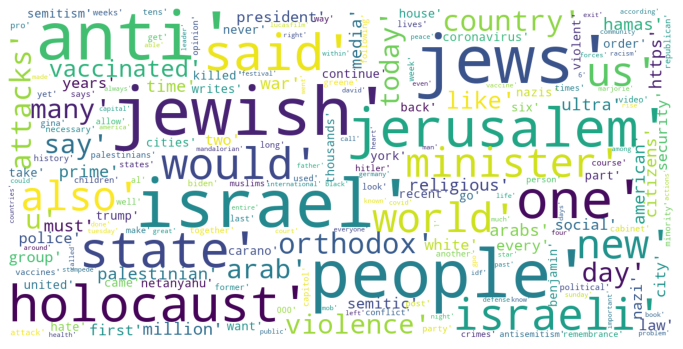

In [92]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words)
#show_wordcloud(Samsung_Reviews_positive['Reviews'])

In [93]:
import json
import pandas as pd
from time import time
import re
from tqdm import tqdm

import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

# To extract n-gram from text
from gensim.models.phrases import Phrases, Phraser
# To train word2vec
from gensim.models import Word2Vec
# To load pre trained word2vec
from gensim.models import KeyedVectors
# To read glove word embedding
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


# To find word frequency (Term frequency)
from collections import defaultdict

In [94]:
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained word2vec model dimention
    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



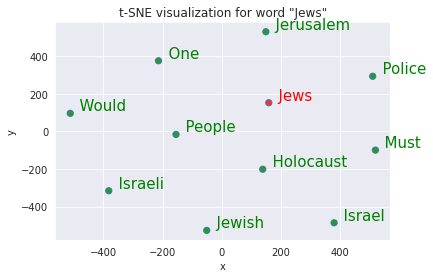

In [95]:
# tsne plot for top 10 similar word to 'food'
tsne_plot(for_word='jews', w2v_model=model)

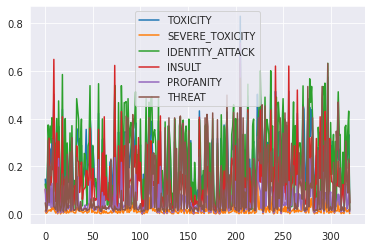

In [96]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/jews.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [62]:
'''# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(df['date'],
        df['message'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="message",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()'''

'# Create figure and plot space\nfig, ax = plt.subplots(figsize=(10, 10))\n\n# Add x-axis and y-axis\nax.plot(df[\'date\'],\n        df[\'message\'],\n        color=\'purple\')\n\n# Set title and labels for axes\nax.set(xlabel="Date",\n       ylabel="message",\n       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")\n\nplt.show()'

# Mention of the terms "jews" and "jewish" in jews dataset

In [217]:
#counting the number of Jews word
corpus=[]
c=0
word="Jews"
word2="jews"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus.append(sum)
    else:
      corpus.append(0)


In [218]:
#counting the number of jewish word
corpus2=[]
c=0
word="Jewish"
word2="jewish"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus2.append(sum)
    else:
      corpus2.append(0)


In [219]:
df["count_jews"]=corpus
df["count_jewish"]=corpus2
#df.head(20)

In [220]:
import plotly.graph_objects as go
fig=plt.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["count_jews"],
                    mode='lines+markers',name="Jews"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_jewish"],
                    mode='lines+markers',name="jewish",))
fig.update_layout(title="Mentions of the terms “Jews” and “jewish”",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [221]:
from plotly import tools        # functions to help build plotly graphs
#import plotly.plotly as py      # module that communicates with plotly 
from plotly.graph_objs import *

In [222]:
import matplotlib.pyplot as plt

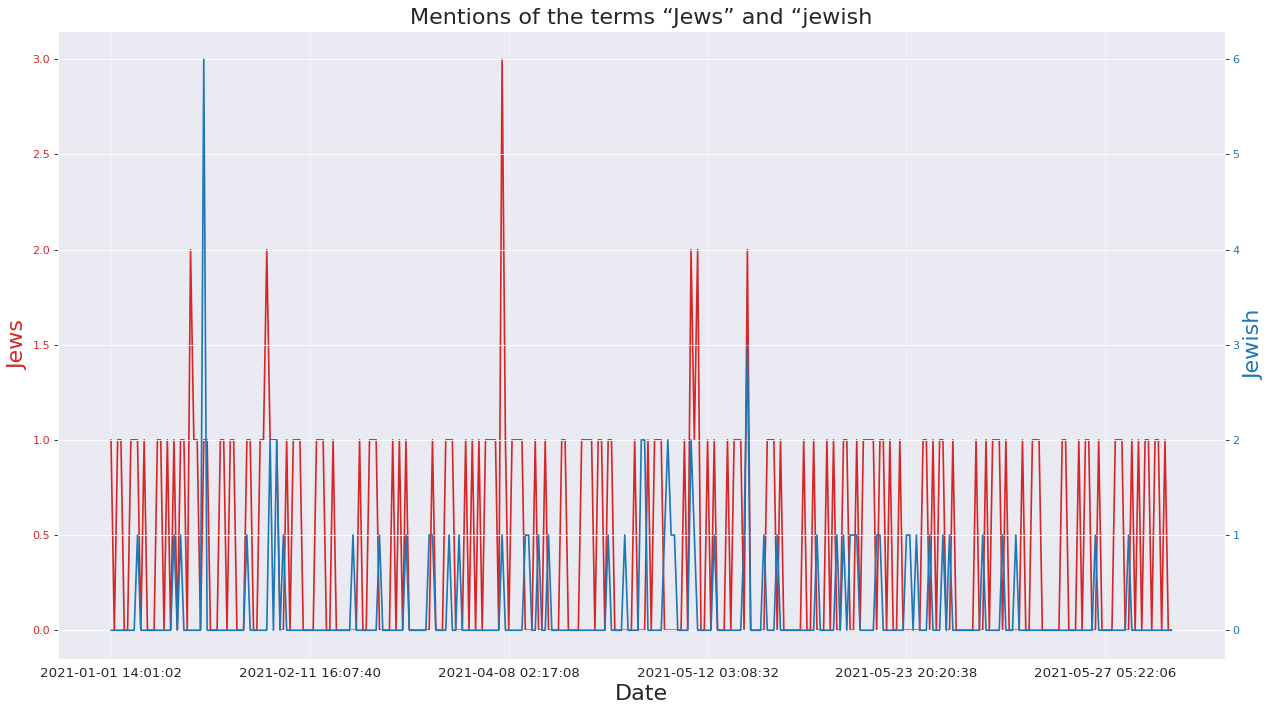

In [238]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x = df['date']
y1 = df['count_jews']
y2 = df['count_jewish']
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Jews', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Jewish", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Mentions of the terms “Jews” and “jewish", fontsize=20)
fig.tight_layout()
plt.show()

# Mentions of Sinophobic racial slurs in Jews dataset

In [227]:
#counting the number of antisemitism word
antisemitism=[]
c=0
word="antisemitism"
word2="Antisemitism"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      antisemitism.append(sum)
    else:
      antisemitism.append(0)
      

In [228]:
#counting the number of antisemitic word
antisemitic=[]
c=0
word="antisemitic"
word2="Antisemitic"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      antisemitic.append(sum)
    else:
      antisemitic.append(0)

In [229]:
#counting the number of zionists word
zionists=[]
c=0
word="zionists"
word2="Zionists"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      zionists.append(sum)
    else:
      zionists.append(0)

In [230]:
#counting the number of supremacist word
supremacist=[]
c=0
word="supremacist"
word2="Supremacist"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      supremacist.append(sum)
    else:
      supremacist.append(0)

In [231]:
#counting the number of islamophobia word
islamophobia=[]
c=0
word="islamophobia"
word2="Islamophobia"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      islamophobia.append(sum)
    else:
      islamophobia.append(0)

In [232]:
#counting the number of extremists word
extremists=[]
c=0
word="extremists"
word2="Extremists"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      extremists.append(sum)
    else:
      extremists.append(0)

In [244]:
df["count_ extremists"]= extremists
df["count_ islamophobia"]= islamophobia
df["count_zionists"]=zionists
df["count_supremacist"]=supremacist
df["count_antisemitic"]=antisemitic
df["count_ antisemitism"]= antisemitism
df.head(20)

,Unnamed: 0,date,message,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT,count_jews,count_jewish,count_ extremists,count_zionism,count_ islamophobia,count_zionists,count_supremacist,count_antisemitic,count_ antisemitism,count_ zionism
0,0,2021-01-01 14:01:02,Prime Minister Benjamin Netanyahu and Health M...,0.145978,0.012841,0.125456,0.103634,0.104054,0.046527,1,0,0,0,0,0,0,0,0,0
1,1,2021-01-03 16:00:17,Albert Einstein's work in civil rights is ofte...,0.072914,0.002527,0.073019,0.059791,0.008163,0.012105,0,0,0,0,0,0,0,0,0,0
2,2,2021-01-04 09:24:03,"In The New York Times Opinion Section ""I’m not...",0.146875,0.006123,0.130355,0.048759,0.021488,0.030992,1,0,0,0,0,0,0,0,0,0
3,3,2021-01-06 00:45:32,A couple was kicked off a flight to Israel aft...,0.273598,0.015933,0.373777,0.157407,0.108910,0.307969,1,0,0,0,0,0,0,0,0,0
4,4,2021-01-10 19:38:57,Anti-Trump Hollywood star Arnold Schwarzenegge...,0.280214,0.013436,0.298063,0.318118,0.035022,0.048236,0,0,0,0,0,0,0,0,0,0
5,5,2021-01-10 16:15:07,Arnold Schwarzenegger posted an impassioned ad...,0.271282,0.017240,0.369346,0.163140,0.118203,0.200061,0,0,0,0,0,0,0,0,0,0
6,6,2021-01-11 19:02:26,Arnold Schwarzenegger compares attack on the C...,0.199361,0.011236,0.298063,0.119424,0.026929,0.160474,1,0,0,0,0,0,0,0,0,0
7,7,2021-01-11 12:50:17,Hollywood actor and former California governor...,0.316505,0.029892,0.404202,0.211880,0.127995,0.225305,1,0,0,0,0,0,0,0,0,0
8,8,2021-01-11 10:00:08,"""It was a night of rampage against the Jews ca...",0.288504,0.017597,0.394145,0.186257,0.029720,0.312296,1,1,0,0,0,0,0,0,0,0
9,9,2021-01-11 01:32:04,“'President Trump is a failed leader. He will ...,0.502328,0.030172,0.093382,0.648984,0.091915,0.031435,0,0,0,0,0,0,0,0,0,0


In [245]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["count_ extremists"],
                    mode='lines+markers',name="extremists"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_ islamophobia"],
                    mode='lines+markers',name="islamophobia"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_zionists"],
                    mode='lines+markers',name="zionists",))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_supremacist"],
                    mode='lines+markers',name="supremacist"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_antisemitic"],
                    mode='lines+markers',name="antisemitic",))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_ antisemitism"],
                    mode='lines+markers',name="antisemitism"))

fig.update_layout(title="Mentions of Sinophobic racial slurs ",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Chinese Dataset

In [246]:
df2=pd.read_csv('/content/chinese.csv')
df.head()

,Unnamed: 0,date,message,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT,count_jews,count_jewish,count_ extremists,count_zionism,count_ islamophobia,count_zionists,count_supremacist,count_antisemitic,count_ antisemitism,count_ zionism
0,0,2021-01-01 14:01:02,Prime Minister Benjamin Netanyahu and Health M...,0.145978,0.012841,0.125456,0.103634,0.104054,0.046527,1,0,0,0,0,0,0,0,0,0
1,1,2021-01-03 16:00:17,Albert Einstein's work in civil rights is ofte...,0.072914,0.002527,0.073019,0.059791,0.008163,0.012105,0,0,0,0,0,0,0,0,0,0
2,2,2021-01-04 09:24:03,"In The New York Times Opinion Section ""I’m not...",0.146875,0.006123,0.130355,0.048759,0.021488,0.030992,1,0,0,0,0,0,0,0,0,0
3,3,2021-01-06 00:45:32,A couple was kicked off a flight to Israel aft...,0.273598,0.015933,0.373777,0.157407,0.108910,0.307969,1,0,0,0,0,0,0,0,0,0
4,4,2021-01-10 19:38:57,Anti-Trump Hollywood star Arnold Schwarzenegge...,0.280214,0.013436,0.298063,0.318118,0.035022,0.048236,0,0,0,0,0,0,0,0,0,0


In [247]:
df2.shape

(3286, 10)

# Text preprocessing

In [258]:
#cleaning the texts
import re
chinese=[]
max=0
for i in range(len(df2)):
    review=re.sub('[^a-zA-Z0-9]',' ',df2['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    #ps = PorterStemmer()
    #review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review=str(review)
    #review=review.split()
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if not w.lower() in stop_words]
    #review=str(review)
    #review=review.split()
    #review=' '.join(review)
    #li = list(review.split(" "))
    #corpus.append(li)
    chinese.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


539


# Applying word2vec

In [259]:
model=gensim.models.Word2Vec(min_count=3,size=50,workers=4,window=5)
model.build_vocab(chinese,progress_per=100)
model.train(chinese,total_examples=model.corpus_count,epochs=10)
words=list(model.wv.index2word)
print(words)

['chinese', 'china', 'u', 'said', 'biden', 'president', 'new', 'government', 'covid', 'https', 'coronavirus', '19', 'year', 'beijing', 'state', 'first', 'officials', 'media', 'world', 'communist', 'one', 'people', 'two', 'country', 'would', 'foreign', 'party', 'trump', 'administration', 'hong', 'says', 'joe', 'companies', 'kong', 'could', 'american', 'us', 'taiwan', 'company', 'pandemic', 'vaccine', 'military', 'united', 'group', 'countries', 'city', 'human', 'states', 'last', 'health', 'reut', 'rs', 'rights', 'xi', 'since', 'social', 'three', 'global', 'wuhan', 'friday', 'week', 'security', 'xinjiang', '000', 'say', 'days', 'back', 'years', 'asian', 'rocket', 'top', 'time', 'like', 'virus', 'origins', 'day', 'including', 'made', 'former', 'report', 'called', 'news', 'tech', 'public', 'also', 'national', 'may', 'long', 'data', 'international', 'according', 'vaccines', 'billion', 'high', 'told', 'team', 'use', 'thursday', 'many', 'organization', 'firm', 'americans', 'jinping', 'york', '

In [260]:
model.wv.most_similar('chinese')
#model.wv.similarity(w1="খারাপ",w2="খারাপ")
#print(model['খারাপ'])

[('government', 0.99396151304245),
 ('ccp', 0.9916714429855347),
 ('propaganda', 0.9915510416030884),
 ('groveling', 0.9912909865379333),
 ('newspaper', 0.9909665584564209),
 ('blackburn', 0.9888501763343811),
 ('ties', 0.9883349537849426),
 ('regime', 0.9881427884101868),
 ('ruling', 0.9881161451339722),
 ('mike', 0.9869338274002075)]

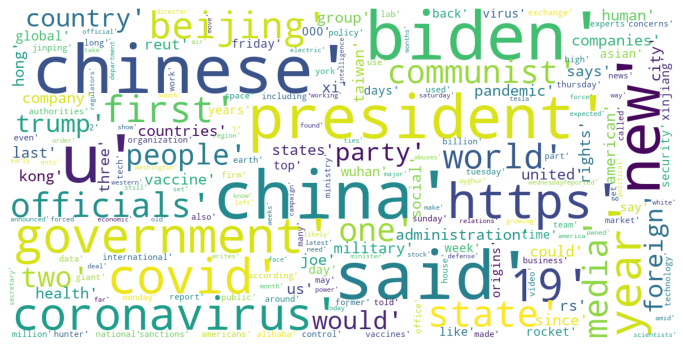

In [261]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words)
#show_wordcloud(Samsung_Reviews_positive['Reviews'])

In [262]:
import json
import pandas as pd
from time import time
import re
from tqdm import tqdm

import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

# To extract n-gram from text
from gensim.models.phrases import Phrases, Phraser
# To train word2vec
from gensim.models import Word2Vec
# To load pre trained word2vec
from gensim.models import KeyedVectors
# To read glove word embedding
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


# To find word frequency (Term frequency)
from collections import defaultdict

In [263]:
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained word2vec model dimention
    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



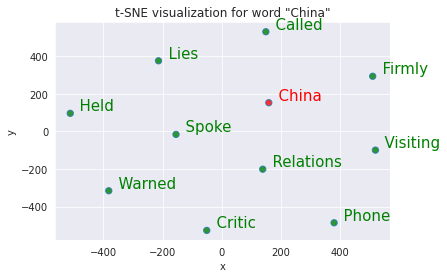

In [265]:
# tsne plot for top 10 similar word to 'food'
tsne_plot(for_word='china', w2v_model=model)

# Mention of the terms "china" and "chinese" in jews dataset

In [ ]:
#counting the number of Jews word
corpus=[]
c=0
word="Jews"
word2="jews"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus.append(sum)
    else:
      corpus.append(0)


In [ ]:
#counting the number of israel word
corpus2=[]
c=0
word="Jewish"
word2="jewish"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus2.append(sum)
    else:
      corpus2.append(0)


In [ ]:
df["count_jews"]=corpus
df["count_jewish"]=corpus2
#df.head(20)

In [ ]:
import plotly.graph_objects as go
fig=plt.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["count_jews"],
                    mode='lines+markers',name="Jews"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_jewish"],
                    mode='lines+markers',name="jewish",))
fig.update_layout(title="Mentions of the terms “Jews” and “jewish”",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x = df['date']
y1 = df['count_jews']
y2 = df['count_jewish']
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Jews', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Jewish", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Mentions of the terms “Jews” and “jewish", fontsize=20)
fig.tight_layout()
plt.show()